<h3 style='text-align: left;'><font color=blue> Twitter Sentiment Analysis</font></h3>
<h4><font color=red> Twitter Data: Extracted using Twitter API V2 </font></h4>

<div class="alert alert-block alert-info"><h2><font color=Black>Data Extraction</font></h2></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from textblob import TextBlob
import re
from collections import Counter

<h2><font color='blue'> Reading the Credentials 

In [2]:
# Calling the Twitter Logic Credential Details
df_key=pd.read_excel("C:/Users/varsh/Downloads/Key.xlsx")

In [3]:
# Assigning the essential key values
access_token= df_key['pw'][3]
access_token_secret= df_key['pw'][4]
consumer_key= df_key['pw'][5]
consumer_secret= df_key['pw'][6]
Bearer_Token=df_key['pw'][2]

In [4]:
# Calling the Twitter client
client = tweepy.Client(bearer_token=Bearer_Token)

<h2><font color='blue'> Extracting Tweets using API

In [5]:
# User Inpur for the Topic of the sentiments to be analysed
query = input("Enter the Keywords related to serach Topic: ")
# query can be = 'Twitter, Elon Musk, Poison Pill,Canada, toronto, etc'

tweets=tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['context_annotations', 'created_at','lang','possibly_sensitive'], 
                        max_results=100).flatten(limit=100)

i=1
data = []
lang=[]
sens=[]
for tweet in tweets:
    print(str(i)+') '+tweet.text)
    data.append([tweet.text])
    lang.append([tweet.lang])
    sens.append([tweet.possibly_sensitive])
    i=i+1

df = pd.DataFrame(data, columns=['Tweet'])
df['Language'] = pd.DataFrame(lang, columns=['Language'])
df['Sensitivity']= pd.DataFrame(sens, columns=['Sensitivity'])

Enter the Keywords related to serach Topic: Toronto Attacks
1) @wei_w_toronto @sunnyxuy @porkistasty @shaunrein Here is a new example of the type of hate crimes I was referring to. You can expect the number and frequency of these types of attacks to grow again in Western countries. Stay safe 🙏 https://t.co/83d2dydhiW
2) @NobodySM64 @rpgfancom yeah and I'd like it to use story beats and music from the games, Street Fighter Easter Egg attacks, a Japanese cast ripped straight from the games (Okiayu IS Zero), and an English cast consisting of Capcom's old friends in Toronto (they got robbed of a chance to work on MMX imo)
3) @EmbassyofRussia @mfa_russia @PMSimferopol @RusEmbassyMinsk @RusEmbEst @RusConsCapetown @russiabeyond @sovietvisuals @Russia_Toronto @EmbRusBotswana @rusemberitrea And now you've made it and everything associated with russia into garbage because of your attacks on Georgia, Moldova, Chechnya, Syria, and Ukraine. https://t.co/VNwUns0ZkS
4) Report: The CIA Is Directing Sa

In [6]:
# Reviewing the heads of the main Data
df.head(40)

,Tweet,Language,Sensitivity
0,@wei_w_toronto @sunnyxuy @porkistasty @shaunre...,en,False
1,@NobodySM64 @rpgfancom yeah and I'd like it to...,en,False
2,@EmbassyofRussia @mfa_russia @PMSimferopol @Ru...,en,False
3,Report: The CIA Is Directing Sabotage Attacks ...,en,False
4,@Volkomm_ @WTIBull @cckanaan In defiance of hi...,en,False
5,Ransomware attacks can be devastating for a bu...,en,False
6,“While we can confirm this is a ransomware att...,en,False
7,And all the attacks and all the provoking and ...,en,False
8,Two more random stranger attacks on Toronto's ...,en,False
9,Two more random stranger attacks on Toronto's ...,en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Data Cleaning</font></h2></div>

In [7]:
# Retaining only Enlish Tweets from Twitter Data.
df_english= df[df.Language =="en"]

In [8]:
# Reviewing the Englist Tweets.
df_english.head(10)

,Tweet,Language,Sensitivity
0,@wei_w_toronto @sunnyxuy @porkistasty @shaunre...,en,False
1,@NobodySM64 @rpgfancom yeah and I'd like it to...,en,False
2,@EmbassyofRussia @mfa_russia @PMSimferopol @Ru...,en,False
3,Report: The CIA Is Directing Sabotage Attacks ...,en,False
4,@Volkomm_ @WTIBull @cckanaan In defiance of hi...,en,False
5,Ransomware attacks can be devastating for a bu...,en,False
6,“While we can confirm this is a ransomware att...,en,False
7,And all the attacks and all the provoking and ...,en,False
8,Two more random stranger attacks on Toronto's ...,en,False
9,Two more random stranger attacks on Toronto's ...,en,False


<h2><font color='blue'> Note: The Tweet on Twitter are available in all languages. We will only Review Tweets in English.

In [9]:
# Removing all the Duplicates from the English Tweets.
df_unique=df_english.drop_duplicates(subset=['Tweet'], keep='first')
df_unique

,Tweet,Language,Sensitivity
0,@wei_w_toronto @sunnyxuy @porkistasty @shaunre...,en,False
1,@NobodySM64 @rpgfancom yeah and I'd like it to...,en,False
2,@EmbassyofRussia @mfa_russia @PMSimferopol @Ru...,en,False
3,Report: The CIA Is Directing Sabotage Attacks ...,en,False
4,@Volkomm_ @WTIBull @cckanaan In defiance of hi...,en,False
5,Ransomware attacks can be devastating for a bu...,en,False
6,“While we can confirm this is a ransomware att...,en,False
7,And all the attacks and all the provoking and ...,en,False
8,Two more random stranger attacks on Toronto's ...,en,False
9,Two more random stranger attacks on Toronto's ...,en,False


In [10]:
df_unique.reset_index(drop=True,inplace=True)

In [11]:
# Reviewing the Unique Englist Tweets.
df_unique.head(30)

,Tweet,Language,Sensitivity
0,@wei_w_toronto @sunnyxuy @porkistasty @shaunre...,en,False
1,@NobodySM64 @rpgfancom yeah and I'd like it to...,en,False
2,@EmbassyofRussia @mfa_russia @PMSimferopol @Ru...,en,False
3,Report: The CIA Is Directing Sabotage Attacks ...,en,False
4,@Volkomm_ @WTIBull @cckanaan In defiance of hi...,en,False
5,Ransomware attacks can be devastating for a bu...,en,False
6,“While we can confirm this is a ransomware att...,en,False
7,And all the attacks and all the provoking and ...,en,False
8,Two more random stranger attacks on Toronto's ...,en,False
9,Two more random stranger attacks on Toronto's ...,en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Regular Expressions</font></h2></div>

In [12]:
# Function to Clean the Tweets from Twitter using Regular Expression(re) Library.
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #To substitue the user names. 
    text=re.sub(r'#','',text)
    text=re.sub(r"\?",'',text)
    text=re.sub(r'!','',text)
    text=re.sub(r'amp','',text) # To substitute Ampersand
    text=re.sub(r'_','',text)
    text=re.sub(r':','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'&',' and ',text)
    text=re.sub(r'RT','',text) # To substitute ReTweets
    text=re.sub(r'"','',text)
    text=re.sub(r"’",'',text)
    text=re.sub(r"‘",'',text)
    text=re.sub(r"'",'',text)
    text=re.sub(r",",'',text)
    text=re.sub(r'[A-Za-z0-9]{1}[.]+', '',text) # To substitute any texts followed by dots.
    text=re.sub(r'\s*RT\s*@[^:]*:.','',text) #To handle ReTweets.
    text=re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',text) # To substitute Links
    text=re.sub(r'https?\/\/\S+','',text) # To substitute Links
    text=re.sub(r'https//','',text) # To substitute Links

    return text
df_unique['Tweet']=df_unique['Tweet'].apply(cleanTxt)

C:\Users\varsh\AppData\Local\Temp/ipykernel_6464/2194987311.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Tweet']=df_unique['Tweet'].apply(cleanTxt)


In [13]:
# Reviewing Clean Unique English Tweets from Twitter
df_unique.head(10)

,Tweet,Language,Sensitivity
0,wtoronto Here is a new exle of the type of ...,en,False
1,yeah and Id like it to use story beats and m...,en,False
2,russia Toronto And now youve made it ...,en,False
3,Report The CIA Is Directing Sabotage Attacks I...,en,False
4,In defiance of his “Westerners are unable t...,en,False
5,Ransomware attacks can be devastating for a bu...,en,False
6,“While we can confirm this is a ransomware att...,en,False
7,And all the attacks and all the provoking and ...,en,False
8,Two more random stranger attacks on Torontos s...,en,False
9,Two more random stranger attacks on Torontos s...,en,False


In [14]:
# Converting all words into to lower case.
df_unique['Tweet']=df_unique['Tweet'].str.lower()

C:\Users\varsh\AppData\Local\Temp/ipykernel_6464/3774127502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Tweet']=df_unique['Tweet'].str.lower()


In [15]:
# Reviewing Clean Unique English Tweets from Twitter
df_unique.head(10)

,Tweet,Language,Sensitivity
0,wtoronto here is a new exle of the type of ...,en,False
1,yeah and id like it to use story beats and m...,en,False
2,russia toronto and now youve made it ...,en,False
3,report the cia is directing sabotage attacks i...,en,False
4,in defiance of his “westerners are unable t...,en,False
5,ransomware attacks can be devastating for a bu...,en,False
6,“while we can confirm this is a ransomware att...,en,False
7,and all the attacks and all the provoking and ...,en,False
8,two more random stranger attacks on torontos s...,en,False
9,two more random stranger attacks on torontos s...,en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Word List</font></h2></div>

In [16]:
# Creating a dataframe to create the Word List. Dropping variables Sensitivity and Language
df_word1=df_unique.drop(columns =['Sensitivity', 'Language'])

In [17]:
# Converting the dataframe word1 to list.
word_list1=df_word1.values.tolist()

In [18]:
# Printing the word list 1
word_list1

[['wtoronto    here is a new exle of the type of hate crimes i was referring t you can expect the number and frequency of these types of attacks to grow again in western countrie stay safe 🙏 '],
 ['  yeah and id like it to use story beats and music from the games street fighter easter egg attacks a japanese cast ripped straight from the games (okiayu is zero) and an english cast consisting of capcoms old friends in toronto (they got robbed of a chance to work on mmx imo)'],
 [' russia       toronto   and now youve made it and everything associated with russia into garbage because of your attacks on georgia moldova chechnya syria and ukrain '],
 ['report the cia is directing sabotage attacks inside russia - news from  uspoli biden trump cdnpoli toronto putin moscow russia vienna berlin  '],
 ['   in defiance of his “westerners are unable to cook meat rare” attacks i will be serving this toronto-style (blue rare)'],
 ['ransomware attacks can be devastating for a busines cybersecurity cyb

<h4><font color='blue'>Note: The Tweets have been stored in form of Nested List. Each Inner List represents a Tweet. In order to make a Word count of most popular Keywords in Tweets, we need to perform following steps: </font></h4>

* <h4>Convert the Tweet String to Words
* <h4>Move the Words from Inner List to Main List.

In [19]:
# Converting Tweets String to Words to analyze the top words related to search topic.
flat_list = [] # creating an empty list to store words from tweets.
str1=""  # Creating an empty string
for sublist in word_list1:
    for item in sublist:
        str1=item
        str2=str1.split(" ") # Splitting the String to Words
        flat_list.append(str2) # Appending the created words to a list
        str1=""

In [20]:
# Reviewing the Words created in Inner List.
flat_list

[['wtoronto',
  '',
  '',
  '',
  'here',
  'is',
  'a',
  'new',
  'exle',
  'of',
  'the',
  'type',
  'of',
  'hate',
  'crimes',
  'i',
  'was',
  'referring',
  't',
  'you',
  'can',
  'expect',
  'the',
  'number',
  'and',
  'frequency',
  'of',
  'these',
  'types',
  'of',
  'attacks',
  'to',
  'grow',
  'again',
  'in',
  'western',
  'countrie',
  'stay',
  'safe',
  '🙏',
  ''],
 ['',
  '',
  'yeah',
  'and',
  'id',
  'like',
  'it',
  'to',
  'use',
  'story',
  'beats',
  'and',
  'music',
  'from',
  'the',
  'games',
  'street',
  'fighter',
  'easter',
  'egg',
  'attacks',
  'a',
  'japanese',
  'cast',
  'ripped',
  'straight',
  'from',
  'the',
  'games',
  '(okiayu',
  'is',
  'zero)',
  'and',
  'an',
  'english',
  'cast',
  'consisting',
  'of',
  'capcoms',
  'old',
  'friends',
  'in',
  'toronto',
  '(they',
  'got',
  'robbed',
  'of',
  'a',
  'chance',
  'to',
  'work',
  'on',
  'mmx',
  'imo)'],
 ['',
  'russia',
  '',
  '',
  '',
  '',
  '',
  '',
  

In [21]:
# Moving the Tweet Words from inner list to main list to make count of main Words.
flat_list_main=[]
for sublist in flat_list:
    for item in sublist:
        flat_list_main.append(item)

In [22]:
# Reviewing the Final Word List created. 
flat_list_main

['wtoronto',
 '',
 '',
 '',
 'here',
 'is',
 'a',
 'new',
 'exle',
 'of',
 'the',
 'type',
 'of',
 'hate',
 'crimes',
 'i',
 'was',
 'referring',
 't',
 'you',
 'can',
 'expect',
 'the',
 'number',
 'and',
 'frequency',
 'of',
 'these',
 'types',
 'of',
 'attacks',
 'to',
 'grow',
 'again',
 'in',
 'western',
 'countrie',
 'stay',
 'safe',
 '🙏',
 '',
 '',
 '',
 'yeah',
 'and',
 'id',
 'like',
 'it',
 'to',
 'use',
 'story',
 'beats',
 'and',
 'music',
 'from',
 'the',
 'games',
 'street',
 'fighter',
 'easter',
 'egg',
 'attacks',
 'a',
 'japanese',
 'cast',
 'ripped',
 'straight',
 'from',
 'the',
 'games',
 '(okiayu',
 'is',
 'zero)',
 'and',
 'an',
 'english',
 'cast',
 'consisting',
 'of',
 'capcoms',
 'old',
 'friends',
 'in',
 'toronto',
 '(they',
 'got',
 'robbed',
 'of',
 'a',
 'chance',
 'to',
 'work',
 'on',
 'mmx',
 'imo)',
 '',
 'russia',
 '',
 '',
 '',
 '',
 '',
 '',
 'toronto',
 '',
 '',
 'and',
 'now',
 'youve',
 'made',
 'it',
 'and',
 'everything',
 'associated',
 'wit

In [23]:
# Making a count of the words created in the main list.
c=Counter(flat_list_main)

# Creating dataframe with list of words and count
df_list = pd.DataFrame.from_records(list(dict(c).items()), columns=['WordList','Count'])

In [24]:
# Printing the Word List dataset.
df_list

,WordList,Count
0,wtoronto,1
1,,71
2,here,1
3,is,17
4,a,20
...,...,...
455,up,1
456,chris,1
457,skys,1
458,chinatown,1


In [25]:
# Removing the extra spaces from the conversion and cleaning the text.
df_list['WordList']=df_list['WordList'].str.strip()

In [26]:
# Creating the variable Length to capture the length of the words in List.
df_list['Length']=df_list['WordList'].str.len()

In [27]:
# Reviewing the list of observation which are empty due to Data Cleaning action.
df_list[df_list['Length']==0].value_counts()

WordList  Count  Length
          71     0         1
dtype: int64

In [28]:
# Reviewing the Shape of Word List.
df_list.shape

(460, 3)

In [29]:
# Removing the blank observations.
df_list = df_list[df_list.Length != 0]

In [30]:
# Reviewing the Shape of Word List after removing the blank observation.
df_list.shape

(459, 3)

<h2><font color='blue'>Note: I've observed the Word List have word which are Article, Pronouns etc. Will need to remove them from our Word List.

In [51]:
# Removing the Article and Pronous from Word List.
Exclusions=["ourselves","hers","between","yourself","but","again","there","about","once","two","during","out","very","having","with","they",
"own","an","be","some","for","do","its","yours","such","into","of","most","itself","other","off","is","s","am","or","who",
"as","from","him","each","the","themselves","until","below","are","we","these","your","his","through","don","nor","me","were",
"her","more","himself","this","down","should","our","their","while","above","both","up","to","ours","had","she","all","no","when",
"at","any","before","them","same","and","been","have","in","will","on","does","yourselves","then","that","because","what","over",
"why","so","say","can","could", "couldn't","did","not","didn't","dont","now","under","he","you","herself","has","just","where","too","only","myself","which","those","i",
"after","few","whom","t","being","if","theirs","my","against","a","by","doing","it","how","further","was","here","than","taking",
"without","much","many","more","whole","want","still","doesn’t","doesnt","isn’t","isnt","take","took","since","would","put","thats","that's","say"
"says","see","like","gt;","get","getting","really","used","even" ]

# Iterating df_list over Exclusion List to remove Exclusion Words.
for i in Exclusions:
    for j in range(len(df_list)):
        val = df_list.iloc[j,0]
        if val == i:
            df_list['WordList'] = df_list['WordList'].replace(val," ")

In [52]:
# Re-calculate the length of the words in Word List.
df_list['Length']=df_list['WordList'].str.len()

In [53]:
# Taking count of all the blank and unnecessary single alphabets from data
df_list[df_list['Length']==1].value_counts()

WordList  Count  Length
          4      1         1
dtype: int64

In [54]:
# Removing all blank and unnecessary single alphabets from data
df_list = df_list[df_list.Length != 1]

In [55]:
# Word list after all cleaning.
df_list

,WordList,Count,Length
0,wtoronto,1,8
5,new,3,3
6,exle,1,4
9,type,1,4
10,hate,6,4
...,...,...,...
454,brought,1,7
456,chris,1,5
457,skys,1,4
458,chinatown,1,9


In [56]:
# Creating sorted count list to get Top 20 words from Word List.  
df_top=df_list.sort_values(by=['Count'],ascending=False)

In [57]:
# Printing the Sorted List
df_top

,WordList,Count,Length
24,attacks,30,7
60,toronto,26,7
184,ttc,11,3
188,transit,10,7
189,transportation,7,14
...,...,...,...
169,graham,1,6
168,demon,1,5
167,satanic,1,7
166,disgusting,1,10


In [58]:
# Keeping only Top 20 words.
df_top20=df_top[:20]

In [59]:
# Printing the Top 20 words 
df_top20

,WordList,Count,Length
24,attacks,30,7
60,toronto,26,7
184,ttc,11,3
188,transit,10,7
189,transportation,7,14
178,random,7,6
187,gobus,7,5
186,gotrain,7,7
185,gotransit,7,9
180,torontos,6,8


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Top 20 words'}, xlabel='WordList', ylabel='Count'>

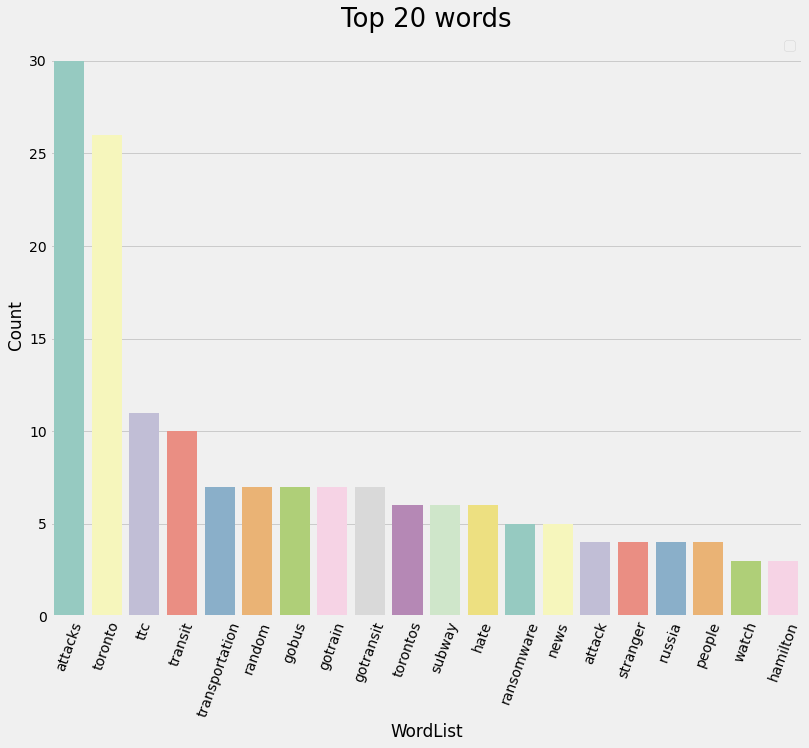

In [60]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=70)
plt.rcParams.update({'font.size': 18})
plt.legend(fontsize = 14)
plt.title("Top 20 words")
sns.barplot(x='WordList',y='Count',data=df_top20,palette = 'Set3')

In [61]:
from wordcloud import WordCloud

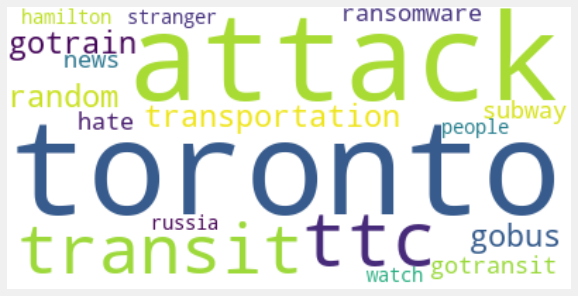

In [62]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False,background_color='white').generate(' '.join(df_top20['WordList']))

# Display the generated Word Cloud
plt.figure(figsize=(9,10), facecolor=None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-block alert-info"><h2><font color=Black>Sentiment Analysis</font></h2></div>

In [63]:
# Performing Sentiment Analysis

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_unique['Subjectivity']=df_unique['Tweet'].apply(getSubjectivity)
df_unique['Polarity']=df_unique['Tweet'].apply(getPolarity)

df_unique.head(50)

C:\Users\varsh\AppData\Local\Temp/ipykernel_6464/1442158285.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Subjectivity']=df_unique['Tweet'].apply(getSubjectivity)
C:\Users\varsh\AppData\Local\Temp/ipykernel_6464/1442158285.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Polarity']=df_unique['Tweet'].apply(getPolarity)


,Tweet,Language,Sensitivity,Subjectivity,Polarity,Analysis
0,wtoronto here is a new exle of the type of ...,en,False,0.463636,-0.040909,Negative
1,yeah and id like it to use story beats and m...,en,False,0.150000,0.075000,Positive
2,russia toronto and now youve made it ...,en,False,0.000000,0.000000,Neutral
3,report the cia is directing sabotage attacks i...,en,False,0.000000,0.000000,Neutral
4,in defiance of his “westerners are unable t...,en,False,0.600000,0.025000,Positive
5,ransomware attacks can be devastating for a bu...,en,False,1.000000,-1.000000,Negative
6,“while we can confirm this is a ransomware att...,en,False,0.750000,0.166667,Positive
7,and all the attacks and all the provoking and ...,en,False,0.950000,-0.900000,Negative
8,two more random stranger attacks on torontos s...,en,False,0.500000,0.000000,Neutral
9,two more random stranger attacks on torontos s...,en,False,0.500000,0.000000,Neutral


In [64]:
# Classifying the Polarity into Negative, Neutral and Positive.
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_unique['Analysis']=df_unique['Polarity'].apply(getAnalysis)

df_unique.head(50) 

C:\Users\varsh\AppData\Local\Temp/ipykernel_6464/2280835249.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Analysis']=df_unique['Polarity'].apply(getAnalysis)


,Tweet,Language,Sensitivity,Subjectivity,Polarity,Analysis
0,wtoronto here is a new exle of the type of ...,en,False,0.463636,-0.040909,Negative
1,yeah and id like it to use story beats and m...,en,False,0.150000,0.075000,Positive
2,russia toronto and now youve made it ...,en,False,0.000000,0.000000,Neutral
3,report the cia is directing sabotage attacks i...,en,False,0.000000,0.000000,Neutral
4,in defiance of his “westerners are unable t...,en,False,0.600000,0.025000,Positive
5,ransomware attacks can be devastating for a bu...,en,False,1.000000,-1.000000,Negative
6,“while we can confirm this is a ransomware att...,en,False,0.750000,0.166667,Positive
7,and all the attacks and all the provoking and ...,en,False,0.950000,-0.900000,Negative
8,two more random stranger attacks on torontos s...,en,False,0.500000,0.000000,Neutral
9,two more random stranger attacks on torontos s...,en,False,0.500000,0.000000,Neutral


In [65]:
# Create a dataframe to capture count of Positive, Neutral and Negative.
df_sens = df_unique['Analysis'].value_counts().rename_axis('Analysis').reset_index(name='Counts')

In [66]:
# Sorting the values to print Positive, Neutral and Negative.
df_sens=df_sens.sort_values(by=['Analysis'],ascending=False)

In [67]:
# Print the Dataset with count
df_sens

,Analysis,Counts
2,Positive,6
1,Neutral,13
0,Negative,17


<AxesSubplot:title={'center':'Polarity Graph'}, xlabel='Analysis', ylabel='Counts'>

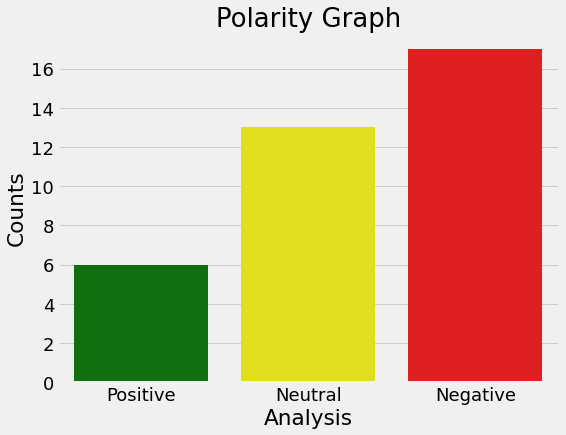

In [68]:
# Plotting Barplot of Positive, Neutral and Negative Counts.
plt.figure(figsize=(8,6))
plt.title("Polarity Graph")
colors = ['green', 'yellow', 'red']
sns.barplot(x="Analysis",y="Counts",data=df_sens,palette =colors)

In [69]:
# Reviewing unique values of Polarity.
df_unique['Polarity'].unique()

array([-0.04090909,  0.075     ,  0.        ,  0.025     , -1.        ,
        0.16666667, -0.9       , -0.03333333, -0.33181818, -0.26666667,
       -0.00416667, -0.8       ,  0.13636364, -0.5       , -0.1875    ,
       -0.18125   , -0.285     , -0.25      , -0.04166667])

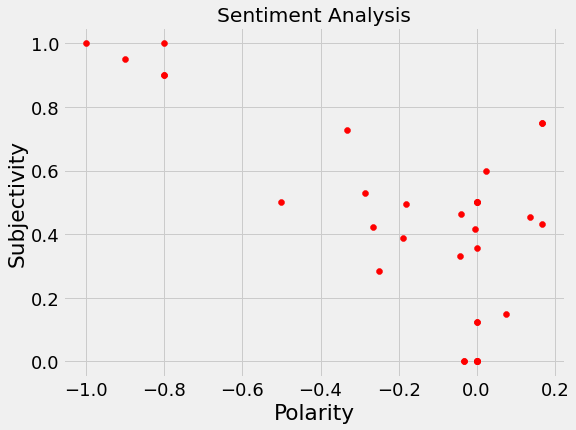

In [70]:
# Plotting Sentiment Analysis Graph of Subjectivity and Polarity. 
plt.figure(figsize=(8,6))
plt.scatter(df_unique['Polarity'],df_unique['Subjectivity'],color='red')
plt.style.use('fivethirtyeight')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()